# XGBoost Classifier
## Daten einlesen

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
import os
import pandas as pd
from src.dataPipeline import DataPipeline

os.chdir('..')

imputer = KNNImputer(n_neighbors=5)

dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=False, get_dummies=False, imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:45: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:72: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

## Zielvariable anpassen

In [8]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_drop = ['type_unified']
columns = [col for col in df.columns if col not in columns_to_drop]
df[columns] = scaler.fit_transform(df[columns])

merge_mapping = {    'attic-room': 'attic-flat',    'castle': 'farmhouse',    'detached-secondary-suite': 'detached-house',    'single-room': 'studio',    'secondary-suite': 'duplex-maisonette'}
df['type_unified'] = df['type_unified'].replace(merge_mapping)

y = df['type_unified']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X = df.drop(columns=['type_unified'])
df.head()

,Floor,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,NoisePollutionRoadM,NoisePollutionRoadS,...,Raised ground floor,Smoking permitted,Swimming pool,View,Washing machine,Waste water connection,Water connection,Wheelchair access,With a summer house,covered
0,1.922166,1.615147,0.908239,0.074500,-0.512866,-0.388248,-0.246234,-1.431708,-1.556591,-1.264134,...,-0.049115,-0.045006,-0.14589,-0.47851,-0.061386,-0.054708,-0.039275,-0.254085,-0.074277,-0.012017
1,0.673710,1.615147,0.908239,0.074500,-0.512866,-0.388248,-0.246234,-1.431708,-1.556591,-1.264134,...,-0.049115,-0.045006,-0.14589,-0.47851,-0.061386,-0.054708,-0.039275,-0.254085,-0.074277,-0.012017
2,0.361597,-0.122414,-0.154019,-0.469891,-0.512866,-0.388248,-0.246234,0.781850,0.950675,0.061176,...,-0.049115,-0.045006,-0.14589,-0.47851,-0.061386,-0.054708,-0.039275,-0.254085,-0.074277,-0.012017
3,0.673710,1.615147,0.908239,0.074500,-0.512866,-0.388248,-0.246234,-1.431708,-1.556591,-1.264134,...,-0.049115,-0.045006,-0.14589,-0.47851,-0.061386,-0.054708,-0.039275,-0.254085,-0.074277,-0.012017
4,-1.198973,0.729361,0.868246,0.410488,-0.512866,-0.388248,-0.246234,-0.830029,-1.030851,-0.360634,...,-0.049115,-0.045006,-0.14589,-0.47851,-0.061386,-0.054708,-0.039275,-0.254085,-0.074277,-0.012017


## Modell erstellen
Es wurden ähnliche Parameter wie beim XGBoost Regressor verwendet.

In [27]:


train_test_split_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_split_ratio)

model = XGBClassifier(objective='multi:softmax', eval_metric='pre', num_class=len(label_encoder.classes_),n_estimators=500, learning_rate=0.2, max_depth=6, reg_lambda=4, reg_alpha=8, subsample=0.7, min_split_loss=4, min_child_weight=4,tree_method='hist', verbosity=1, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}')


# Train 
y_pred_train = model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='weighted')
recall = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

print(f'Train Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}')

Test Accuracy: 0.665 | Precision: 0.598 | Recall: 0.665 | F1: 0.603
Train Accuracy: 0.695 | Precision: 0.680 | Recall: 0.695 | F1: 0.636


C:\FHNW_Programmiersachen\5_Sem\immo_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


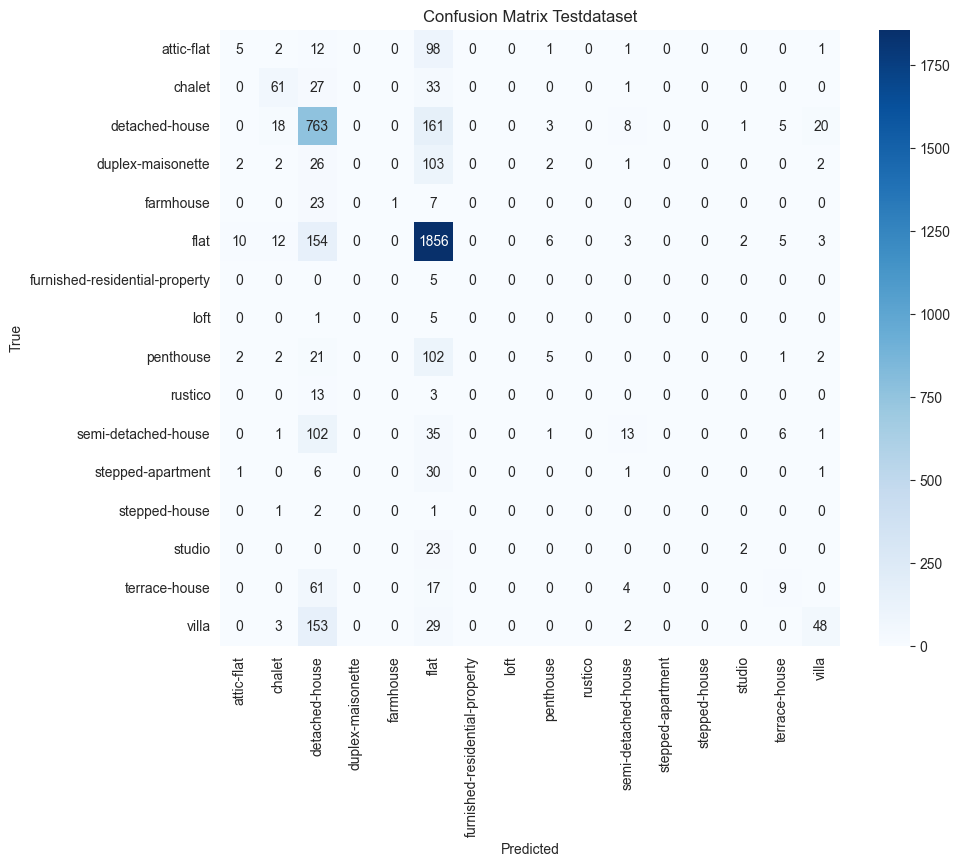

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix without masking
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cbar=True)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Testdataset')
plt.show()


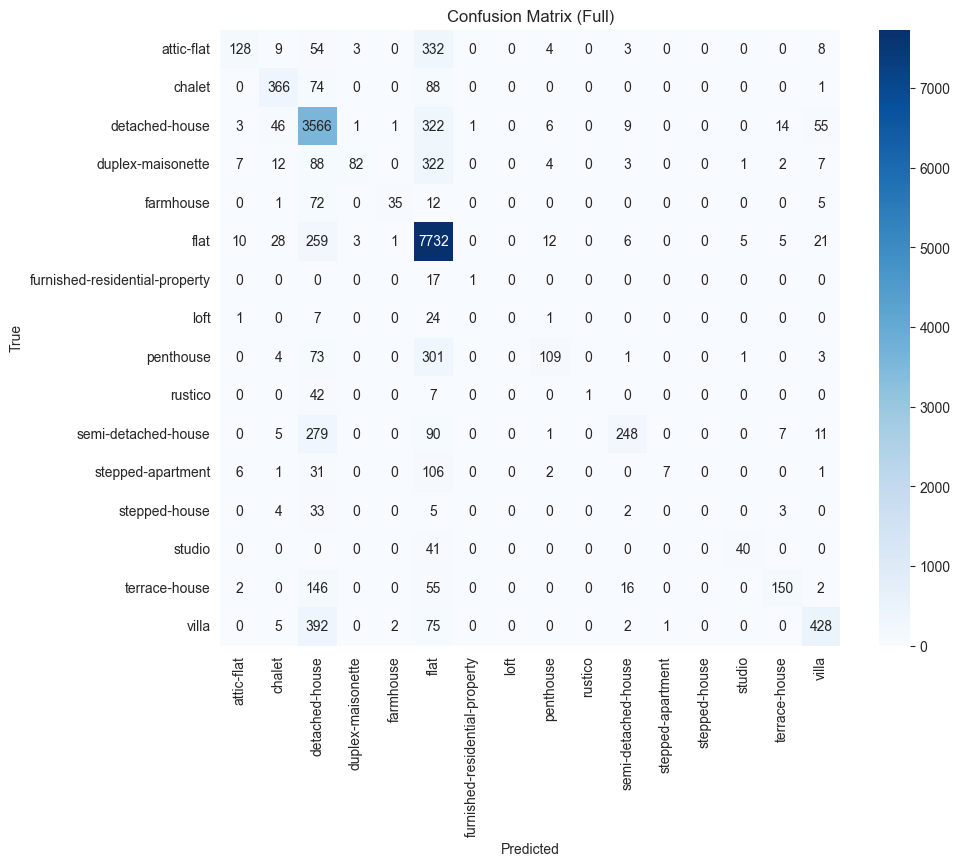

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix without masking
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cbar=True)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Full)')
plt.show()
